In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:/coding/0_be_precise/indicators_revision/data/raw/')

In [165]:
data = pd.read_csv('AWAGE.csv', sep=',')

In [153]:
data

,DAT,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
0,2015-03,"99,9","99,9","99,9","99,9","99,9","99,9","99,9","99,9","99,9",...,101,101,101,101,101,101,101,101,101,101
1,2015-06,"98,3","98,3","98,3","98,3","98,3","98,3","98,3","98,3","98,3",...,"99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,5"
2,2015-09,"99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,5",...,"100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5"
3,2015-12,"99,1","99,1","99,1","99,1","99,1","99,1","99,1","99,1","99,1",...,100,100,100,100,100,100,100,100,100,100
4,2016-03,"101,1","101,1","101,1","101,1","101,1","101,1","101,1","101,1","101,1",...,"100,7","100,7","100,7","100,7","100,7","100,7","100,7","100,7","100,7","100,7"
5,2016-06,"101,5","101,5","101,5","101,5","101,5","101,5","101,5","101,5","101,5",...,"100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5","100,5"
6,2016-09,101,101,101,101,101,101,101,101,101,...,"101,7","101,7","101,7","101,7","101,7","101,7","101,7","101,7","101,7","101,7"
7,2016-12,"101,7","101,7","101,7","101,7","101,7","101,7","101,7","101,7","101,7",...,"104,1","104,1","104,1","104,1","104,1","104,1","104,1","104,1","104,1","104,1"
8,2017-03,NaN,NaN,"100,1","100,1","100,1","100,1","100,1","100,1","100,1",...,"103,9","103,9","103,9","103,9","103,9","103,9","103,9","103,9","103,9","103,9"
9,2017-06,NaN,NaN,NaN,NaN,NaN,"103,8","103,8","103,8","103,8",...,"105,4","105,4","105,4","105,4","105,4","105,4","105,4","105,4","105,4","105,4"


## Частота пересмотров

In [219]:
def count_frequency(dat, period, diff, change='change'):
    second_column_name = dat.columns[1]
    try:
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]
    except:
        second_column_name = dat.columns[3]
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]

    num_rows = dat.shape[0]
    column_names = dat.columns

    changed, not_changed = 0, 0

    for index, row in dat.iloc[row_index:num_rows+1].iterrows():
        first_non_nan_index = row[1:].first_valid_index()

        if first_non_nan_index in column_names:
            current_index = column_names.get_loc(first_non_nan_index)
            if current_index < len(column_names) - period:
                next_column = column_names[current_index + period]
            else:
                next_column = None

            if next_column:
                next_index = column_names.get_loc(next_column)
                if row[next_column] == row[next_index-diff]:
                    #print(next_column, ' ', column_names[next_index-diff])
                    not_changed += 1
                else:
                    if next_column != change:
                        #print(next_column, ' ', column_names[next_index-diff])
                        if period == 12:
                            print(row[0])
                        changed += 1

    return changed, not_changed

In [220]:
def gather_frequences(dat, max_period, diff, change='change'):
    frequences = list()
    if diff > 1:
        steps = range(diff, max_period+1, diff)
    else:
        steps = range(1, max_period+1, diff)

    for i in steps:
        ch, nch = count_frequency(dat, i, diff, change='change')
        frequences.append(ch/(ch+nch))
    return steps, frequences

In [221]:
data = pd.read_csv('GDP.csv', sep=',')

In [222]:
x, fr = gather_frequences(data, 36, 3, change='change')

2002-03
2002-12
2003-03
2003-12
2004-03
2005-03
2005-12
2006-03
2006-12
2007-03
2008-03
2008-12
2009-03
2009-09
2009-12
2010-03
2010-12
2011-03
2012-03
2012-12
2013-03
2014-03
2014-12
2015-03
2015-12
2016-03
2016-12
2017-12
2018-03
2018-12
2019-03
2020-03
2020-12
2021-03
2021-12
2022-03


In [203]:
pd.DataFrame({'month': x, 'frequency': fr})

,month,frequency
0,3,0.400000
1,6,0.291667
2,9,0.304348
3,12,0.272727
4,15,0.380952
5,18,0.300000
6,21,0.210526
7,24,0.055556
8,27,0.058824
9,30,0.062500


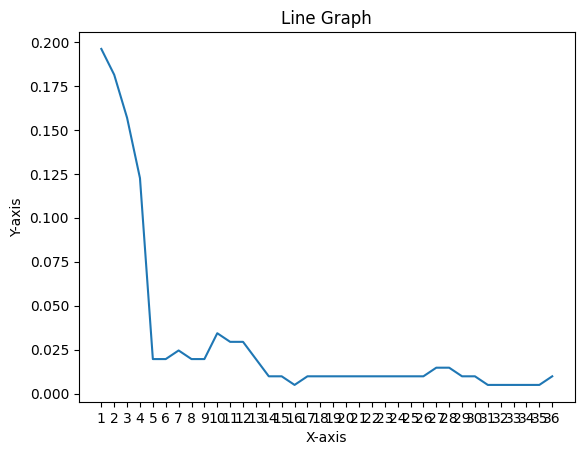

In [125]:
plt.plot(x, fr)

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph')
plt.xticks(x)

# Display the plot
plt.show()

In [12]:
subset = data.iloc[3, 1:]

# Find the index of the first non-NaN value
first_non_nan_index = subset.first_valid_index()
print(first_non_nan_index)

# Add 2 to the index to account for the offset from column 2 onwards
if first_non_nan_index is not None:
    first_non_nan_index += 2

print("Index of first non-NaN value:", first_non_nan_index)

2014-12


TypeError: can only concatenate str (not "int") to str

## Магнитуда пересмотров через определенный период

In [141]:
def find_change(dat, period):
    second_column_name = dat.columns[1]
    try:
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]
    except:
        second_column_name = dat.columns[3]
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]

    num_rows = dat.shape[0]
    num_columns = dat.shape[1]
    column_names = dat.columns

    periods = list()
    change = list()

    for index, row in dat.iloc[row_index:num_rows+1].iterrows():
        first_non_nan_index = row[1:].first_valid_index()

        if first_non_nan_index in column_names:
            current_index = column_names.get_loc(first_non_nan_index)
            if current_index < len(column_names) - period:
                next_column = column_names[current_index + period]

                periods.append(row[0])
                change.append(float(row[next_column].replace(',', '.')) - float(row[current_index].replace(',', '.')))
            else:
                next_column = None

    return pd.DataFrame({'month': periods, 'change': change})

In [163]:
data = pd.read_csv('RMINCOME_LONG.csv', sep=',')

In [164]:
find_change(data, 6)

,month,change
0,2014-03,-0.1
1,2014-06,-1.3
2,2014-09,0.4
3,2014-12,0.4
4,2015-03,0.0
5,2015-06,0.2
6,2015-09,-0.8
7,2015-12,-0.2
8,2016-03,0.4
9,2016-06,-0.6


## Магнитуда пересмотров

In [ ]:
def count_magnitude(dat, period, diff, change='change'):
    second_column_name = dat.columns[1]
    try:
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]
    except:
        second_column_name = dat.columns[3]
        row_index = dat[dat.iloc[:, 0] == second_column_name].index[0]

    num_rows = dat.shape[0]
    num_columns = dat.shape[1]
    column_names = dat.columns

    plus, minus = 0, 0

    for index, row in dat.iloc[row_index:num_rows+1].iterrows():
        first_non_nan_index = row[1:].first_valid_index()

        if first_non_nan_index in column_names:
            current_index = column_names.get_loc(first_non_nan_index)
            if current_index < len(column_names) - period:
                next_column = column_names[current_index + period]
            else:
                next_column = None

            if next_column:
                next_index = column_names.get_loc(next_column)
                if row[next_column] == row[next_index-diff]:
                    not_changed += 1
                else:
                    if next_column != change:
                        changed += 1

    return changed, not_changed